<a href="https://colab.research.google.com/github/MarcosAutuori/My_Fastai_Book_FastAi_Course/blob/master/05_pathlib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Path – How to Use the Pathlib Module with Examples
Rochdi Khalid


https://www.freecodecamp.org/news/how-to-use-pathlib-module-in-python/

In [ ]:
#Drive -
from google.colab import drive
drive.mount('/content/drive')
import pathlib

Mounted at /content/drive


Each operating system has different rules for constructing file paths. For example, <font color='red'>Linux ☭</font> uses forward slashes for paths, while <font color='blue'>Windows 🤑</font> uses backslashes.

This small difference can cause issues if you are working on a project and you want other developers who come from different operating systems to expand your code.

Fortunately, if you're coding in Python, the Pathlib module does the heavy lifting by letting you make sure that your file paths work the same in different operating systems. Also, it provides functionalities and operations to help you save time while handling and manipulating paths.

##Prerequisites
Pathlib comes as default with Python >= 3.4. However, if you are using a version of Python lower than 3.4, you won't have access to this module.

##How Does Pathlib Work?
To understand how you can construct a basic path using Pathlib, let's create a new Python file called `001.png` and put it inside a particular directory.

Open the file, and type the following content:

In [ ]:
p0 = pathlib.Path()
p1 = pathlib.PurePath('001.png')
p2 = pathlib.Path('/content/drive/MyDrive/AI_images/001.png')
p3 = pathlib.PurePosixPath('001.png')
p4 = pathlib.PureWindowsPath('001.png')
p5 = pathlib.PurePath('folder/001.png')

In [ ]:
p0, p1, p2, p3, p4, p5

(PosixPath('.'),
 PurePosixPath('setup.py'),
 PosixPath('/content/drive/MyDrive/AI_images/001.png'),
 PurePosixPath('setup.py'),
 PureWindowsPath('setup.py'),
 PurePosixPath('folder/setup.py'))

#Pure paths in Python
Pure paths manipulate a file path on your machine even if it belongs to a different operating system.

For example, let's say you are on Linux and you want to use a Windows file path. Here, Pure path class objects will help you get the path working on your machine with some basic operations like creating child paths or accessing individual parts of a path.

But pure paths won't be able to mimic some other operations like <font color='orange'>creating a directory or a file</font> because you are not actually in that operating system.

##How to use pure paths
As you can see in the diagram above, pure paths consist of three classes that handle any file system path on your machine:

`PurePath()` is the root node that provides handling operations to every path object in Pathlib.

When you instantiate `PurePath()`, it creates two classes to handle Windows paths and non-Windows paths. `PurePath()` creates a generic path object "agnostic path", regardless of the operating system you are running on.



In [ ]:
p1 = pathlib.PurePath('setup.py')
p1

PurePosixPath('setup.py')

`PurePath()` in the example above creates a `PurePosixPath()` because we assumed we are running on a Linux machine. But if you instantiate it on Windows you will get something like `PureWindowsPath('setup.py')`.

`PurePosixPath()` is the child node of `PurePath()` implemented for non-Windows file system paths.

In [ ]:
p3 = pathlib.PurePosixPath('setup.py')
p3

PurePosixPath('setup.py')

You will not get any error if you instantiate `PurePosixPath()` on Windows because too simply this class doesn't make system calls.

`PureWindowsPath()` is the child node of `PurePath()` implemented for Windows file system paths.

In [ ]:
p4 = pathlib.PureWindowsPath('setup.py')
p4

PureWindowsPath('setup.py')

The same applies to `PureWindowsPath()` since this class doesn't provide system calls, so instantiating it will not raise any error for other operating systems.

Pathlib creates a path to this file by putting this particular script in a Path object. Pathlib contains many objects such as `PosixPath()` and `PurePath()`, which we will learn more about in the following sections.

Before we jump into this, Pathlib divides the filesystem paths into two different classes that represent two types of path objects: <font color='purple'>Pure Path</font> and <font color='orange'>Concrete Path.

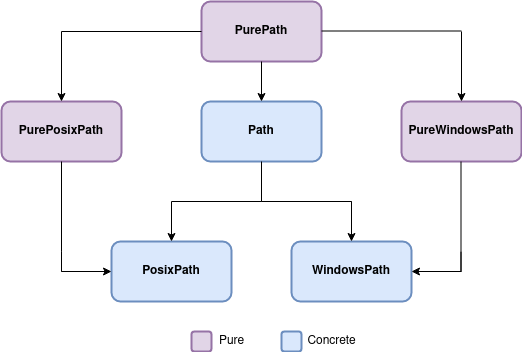

The pure path provides utilities to handle and manipulate your file path without making writing operations.

The concrete path allows you to manipulate and do writing operations on your file path.

In other words, a concrete path is a subclass of a Pure path.

It inherits manipulation from the parent class and adds input/output operations that do system calls.

##Pure path properties
Each subclass in `PurePath()` provides the following properties:

`PurePath().parent` outputs the parent of the path:

In [ ]:
p1 = pathlib.PurePath('o_homem/eh/bom.txt')

In [ ]:
p1.parent

PurePosixPath('o_homem/eh')

In the example above, we are using the `.parent` property to get the path of the logical parent of `bom.txt`.

`PurePath().parents[n]` outputs the ancestors of the path:

In [ ]:
p1, p1.parents[0], p1.parents[1], p1.parents[2], p1.parents[-1], p1.parents[-2], p1.parents[-3],p1

(PurePosixPath('o_homem/eh/bom.txt'),
 PurePosixPath('o_homem/eh'),
 PurePosixPath('o_homem'),
 PurePosixPath('.'),
 PurePosixPath('.'),
 PurePosixPath('o_homem'),
 PurePosixPath('o_homem/eh'),
 PurePosixPath('o_homem/eh/bom.txt'))

In [ ]:
p1 = pathlib.PurePath('o_homem/eh/bom/demais.txt')

In [ ]:
p3 = p1.parents[0]
p3

PurePosixPath('o_homem/eh/bom')

You should always specify the ancestor index in the square brackets as seen above. In Python 3.10 and above, you can use slices and negative index values.

In [ ]:
p2 = p1.parents[1:2]
p2

(PurePosixPath('o_homem/eh'),)

In [ ]:
p4 = p1.parents[1:2]

In [ ]:
p2 = pathlib.PurePath(p1.parents[1:2][0])
p5 = pathlib.PurePath(p2)

`PurePath().name` provides the name of the last component of your path:

In [ ]:
p1.name, p2.name

('demais.txt', 'eh')

In this example, the final path component is `demais.txt`. So, the .name property outputs the name of the file  `demais.txt`which is main with its suffix `.txt`.

On the other hand, `PurePath().suffix` provides the file extension of the last component of your path:

In [ ]:
p1.suffix, p2.suffix

('.txt', '')

Compared to the `.name` property, the `.suffix` property outputs the file extension and excludes the file name.

`PurePath().stem` outputs only the name of the final component of your path without the suffix:

In [ ]:
p1.stem, p2.stem

('demais', 'eh')

As seen above, the `.stem` property excludes the suffix of the final component `demais.txt` and provides only the name of the file.

##Pure path methods
Each subclass of `PurePath()` provides the following methods:

`PurePath().is_absolute()` checks whether your path is absolute or not:

In [ ]:
p1 = pathlib.PurePath('setup.py')
p2 = pathlib.Path('/content/drive/MyDrive/AI_images/002.png')
p3 = pathlib.Path('/home/marcos/Imagens/Destaque-Martinho-da-Vila.jpg')
p4 = pathlib.Path('/content/drive/MyDrive/AI_images')

In [ ]:
p1.is_absolute(), p2.is_absolute(), p3.is_absolute()

(False, True, True)

Note that the absolute path consists of a root and drive name. In this case, `PurePath()` doesn't allow us to know the drive's name.

If you use `PureWindowsPath()`, you can represent an absolute path that contains a drive name like `PureWindowsPath('c:/Program Files')`.

`PurePath().is_relative()` checks whether the path belongs to the other given path or not:

In [ ]:
p2.is_relative_to('/drive'), p2.is_relative_to('/content')

(False, True)

In the first example, the given path `/drive` is not a part of or belongs to the path $p2$, while the other given path `/content` raises `True` because it has relative relationship with the path $p2$.

`PurePath().joinpath()` concatenates the path with the given arguments (child paths):

In [ ]:
p4 = pathlib.Path('/content/drive/MyDrive/Videos')
p7 = p4.joinpath('testes','teste.mp4')
p7

PosixPath('/content/drive/MyDrive/Videos/testes/teste.mp4')

Note that there is no need to add slashes in your given arguments, as the `.joinpath()` method handles this for you.

`PurePath().match()` checks whether the path matches a given pattern:

In [ ]:
pathlib.PurePath('/src/goo/scripts/main.py').match('*.py')

True

Verifica se path termina com qualquer arquivo com sufixo `.py`.

In [ ]:
pathlib.PurePath('/src/goo/scripts/main.py').match('goo/*.py')

False

Verifica se path termina com qualquer arquivo com sufixo .py na pasta `goo`.

In [ ]:
pathlib.PurePath('/src/goo/goo/main.py').match('goo/*.py')

True

Verifica se path termina com qualquer arquivo com sufixo .py e não está em uma pasta

In [ ]:
pathlib.PurePath('src/goo/scripts/main.py').match('/*.py')

False

In [ ]:
pathlib.PurePath('/main.py').match('/*.py')

True

In [ ]:
pathlib.PurePath('main.py').match('/*.py')

False

In [ ]:
pathlib.PurePath('src/goo/scripts/main.py').match('*/*.py')

True

In [ ]:
pathlib.PurePath('foo/main.py').match('*/*.py')

True

In [ ]:
pathlib.PurePath('/main.py').match('*/*.py')

True

In [ ]:
pathlib.PurePath('main.py').match('*/*.py')

False

Based on the examples above, the pattern should match the path. If the given pattern is absolute, the path must be absolute too.

Absolute --> `/*`

`PurePath().with_name()` changes the name of the final component with its suffix:

In [ ]:
p = pathlib.PurePath('/src/goo/scripts/main.py')
p.with_name('app.js')

PurePosixPath('/src/goo/scripts/app.js')

In [ ]:
p

PurePosixPath('/src/goo/scripts/main.py')

The `.with_name()` method doesn't change the name of the last component permanently. Also, if the given path doesn't contain a name, an error occurs as mentioned in the official documentation.

`PurePath().with_stem()` changes only the name of the final component of the path:

In [ ]:
p = pathlib.PurePath('/src/goo/scripts/main.py')
p.with_stem('app')

PurePosixPath('/src/goo/scripts/app.py')

In [ ]:
p

PurePosixPath('/src/goo/scripts/main.py')

This is similar to the `.with_name()` method. The `.with_stem()` changes the name of the last component temporarily. Also, if the given path doesn't contain a name, an error will occur.

`PurePath().with_suffix()` temporarily changes the suffix or the extension of the final component of your path:  

In [ ]:
p = pathlib.PurePath('/src/goo/scripts/main.py')
p.with_suffix('.js')

PurePosixPath('/src/goo/scripts/main.js')

In [ ]:
p

PurePosixPath('/src/goo/scripts/main.py')

If the name of the given path contains no suffix, the `.with_suffix()` method adds the suffix for you:



In [ ]:
p = pathlib.PurePath('/src/goo/scripts/main')
p.with_suffix('.py')

PurePosixPath('/src/goo/scripts/main.py')

But, if we don't include the suffix and we keep the argument empty '', the current suffix will be removed.

In [ ]:
p = pathlib.PurePath('/src/goo/scripts/main')
p.with_suffix('')

PurePosixPath('/src/goo/scripts/main')

Some methods like `.with_stem()`, and `.is_relative_to()` have been added recently to Python 3.9 and above. So, if you call these methods using Python 3.8 or lower, an attribute error is raised.

#Concrete Paths in Python
Concrete Paths allows you to handle, manipulate, and do writing operations on different filesystem paths.

In the other words, this type of path object helps you to create for example a new file, a new directory, and do other input/output operations while not being in that operating system.

##How to use concrete paths
Concrete paths handle any file system path and make system calls on your machine. Those path objects are the child paths of the pure paths and consist of three subclasses like the pure ones:

`Path()` is the child node of `PurePath()`, it provides handling operations with the ability to do writing operations on your path.

When you instantiate `Path()`, it creates two classes to handle Windows paths and non-Windows paths. Like `PurePath()`, `Path()` also creates a generic path object "agnostic path", regardless of the operating system you are running on.



In [ ]:
pathlib.Path('setup.py')

PosixPath('setup.py')

`Path()` in the example above creates a `PosixPath()` because we assume we are running on a Linux machine. But if you instantiate it on Windows you will get something like `WindowsPath('setup.py')`

`PosixPath()` is the child node of `Path()` and `PurePosixPath()`, implemented to handle and manipulate non-Windows file system paths.

In [ ]:
pathlib.PosixPath('setup.py')

PosixPath('setup.py')

You will get an error if you instantiate `PosixPath()` on a Windows machine because you cannot make system calls while running on a different operating system.

`WindowsPath()` is the child node of `Path()` and `PureWindowsPath()` implemented for Windows file system paths.



In [ ]:
pathlib.WindowsPath('setup.py')
#NotImplementedError: cannot instantiate 'WindowsPath' on your system

The same applies to `WindowsPath()` since you are running on a different operating system – so instantiating it will raise an error.

##Properties of concrete paths
Since the concrete path is the subclass of the pure path, you can do everything with concrete paths using the `PurePath()` properties. This means that we can use, for example, the `.with_suffix` property to add a suffix to a concrete path:

In [ ]:
p = pathlib.Path('/src/goo/scripts/main')
p.with_suffix('.py')

Or, you can check if a given path is relative to the original path:

In [ ]:
p = pathlib.Path('/src/goo/scripts/main.py')
p.is_relative_to('/src')

Always remember that concrete paths <font color='orange'>inherit</font> handling operations from the pure paths and add writing operations that do system calls and input/output configurations.

##Methods of concrete path
Each subclass of Path() provides the following methods to handle paths and do system calls:

Path().iterdir() returns the content of a directory. Let's say we have the following folder that contains the following files:

###Path().mkdir() creates a new directory at a given path:

In [ ]:
p = pathlib.Path('data')

In [ ]:
directory = pathlib.Path('data/secrets')

In [ ]:
directory.exists()

False

In [ ]:
directory

PosixPath('data/secrets')

In [ ]:
for child in p.iterdir():
  print(child)

FileNotFoundError: ignored

In [ ]:
directory.mkdir(parents = False, exist_ok = False)

FileNotFoundError: ignored